<a href="https://colab.research.google.com/github/PrinceLeBon/30DaysOfJavascripts/blob/main/RLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
# @title Install & import dependencies
!pip install tensorflow-gpu==2.11.0 tensorflow==2.11.0 stable-baselines3 gym-anytrading gym shimmy>=0.2.1

In [98]:
# Gym elements
import gym
import gym_anytrading

# stable baselines
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
import torch as th

#Processing Library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [99]:
# read dataset
df = pd.read_csv("data/eurusd.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0.0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0.0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0.0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0.0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0.0


In [100]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [101]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [102]:
df.set_index('Date', inplace=True)
df = df.sort_index()
df.dropna(inplace=True)
df.head()
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5101, 6)

In [103]:
#env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)
env = gym.make('forex-v0', df=df, frame_bound=(10, 100), window_size=10)
env.signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/lo

array([[ 1.196501e+00,  0.000000e+00],
       [ 1.208897e+00,  1.239600e-02],
       [ 1.212298e+00,  3.401000e-03],
       [ 1.208094e+00, -4.204000e-03],
       [ 1.218695e+00,  1.060100e-02],
       [ 1.222001e+00,  3.306000e-03],
       [ 1.224995e+00,  2.994000e-03],
       [ 1.219096e+00, -5.899000e-03],
       [ 1.222404e+00,  3.308000e-03],
       [ 1.227898e+00,  5.494000e-03],
       [ 1.231997e+00,  4.099000e-03],
       [ 1.232195e+00,  1.980000e-04],
       [ 1.240202e+00,  8.007000e-03],
       [ 1.242298e+00,  2.096000e-03],
       [ 1.238497e+00, -3.801000e-03],
       [ 1.239895e+00,  1.398000e-03],
       [ 1.240003e+00,  1.080000e-04],
       [ 1.245299e+00,  5.296000e-03],
       [ 1.244803e+00, -4.960000e-04],
       [ 1.243194e+00, -1.609000e-03],
       [ 1.248393e+00,  5.199000e-03],
       [ 1.254894e+00,  6.501000e-03],
       [ 1.259002e+00,  4.108000e-03],
       [ 1.258194e+00, -8.080000e-04],
       [ 1.258194e+00,  0.000000e+00],
       [ 1.268698e+00,  1

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the envir

info {'total_reward': 1242.8600000000035, 'total_profit': 1.056742238240064, 'position': 0}


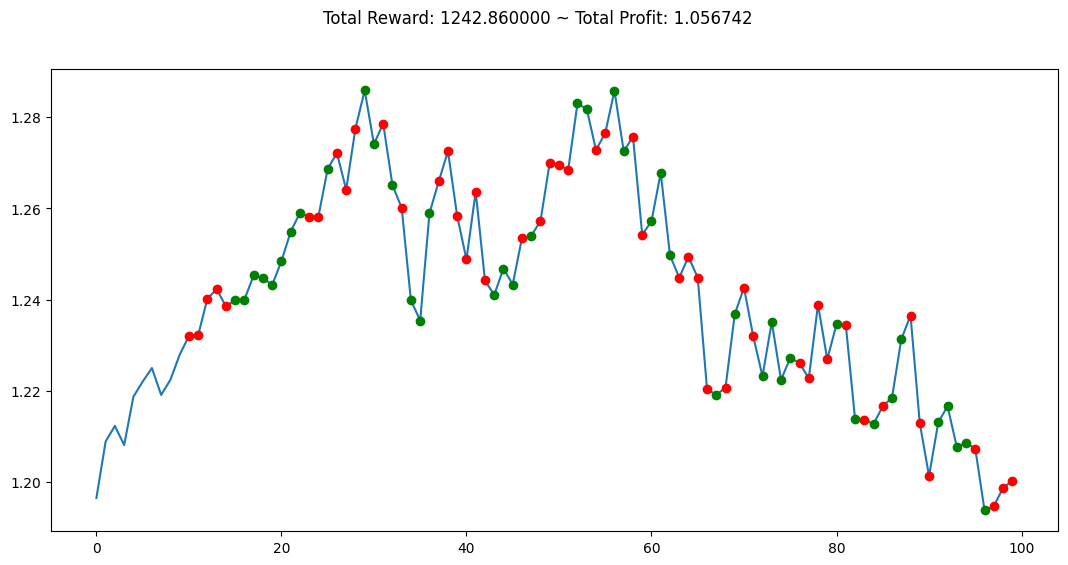

In [104]:
#@title Build environment
state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break
plt.figure(figsize=(13,6))
plt.cla()
env.render_all()
plt.show()


In [105]:
#@title Build Environment and train
#env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, len(df)), window_size=5)
env_maker = lambda: gym.make('forex-v0', df=df, frame_bound=(10, len(df)), window_size=10, unit_side = 'right')
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [106]:
#policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[64, 64])

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=4000)

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 479       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.0894   |
|    explained_variance | -44.5     |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -9.93e-06 |
|    value_loss         | 4.41e-05  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 521       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.0375   |
|    explained_variance | -860      |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -3.46e-

In [107]:
len(df)

5101

In [120]:
#@title Evaluation
#dff = pd.read_csv("data/gme.csv")
#dff['Date'] = pd.to_datetime(dff['Date'])
#dff.set_index('Date', inplace=True)
#dff=dff.sort_index()
#dff.head()
#env = gym.make('stocks-v0', df=dff, frame_bound=(30, 80), window_size=5)
env = gym.make('forex-v0', df=df, frame_bound=(10, 1000), window_size=10, unit_side = 'right')
obs = env.reset()
while True:
    #From YT
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -1046.980000000017, 'total_profit': 1.0064884898580837, 'position': 0}


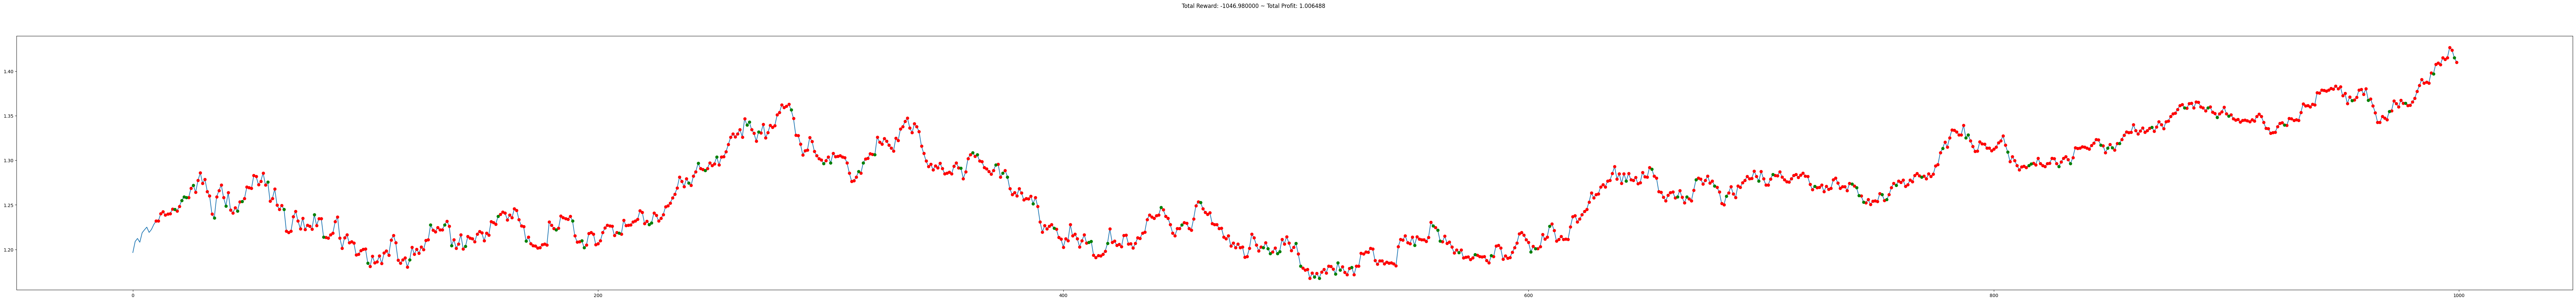

In [121]:
plt.figure(figsize=(100,10))
env.render_all()
plt.cla
plt.show()